In [3]:
import matplotlib.pyplot as plt
import pandas as pd

In [4]:
# start_date = '2024-2'
# end_date = '2024-5'
# virkar mjög vel
start_date = '2024-1'
end_date = '2024-12'

import os

path = "/Users/frodibrooks/Desktop/DTU/Thesis/OptimisedHeating/Data_processing/data" # mac
# path = "C:/Users/frodi/Documents/OptimisedHeating/Data_processing/data" # windowds


os.chdir(path)

## Pressure in mH20

In [5]:
Rjupnasalir_pressure = pd.read_excel('H-KOP-RS-ÞS212.xlsx')
Rjupnasalir_pressure.drop(columns=["mpoint_id","mpoint_name","aggregate_name","aggregate_id","flag","quality_description","event_time"],inplace=True)
Rjupnasalir_pressure['start_time'] = pd.to_datetime(Rjupnasalir_pressure['start_time'], errors='coerce')
Rjupnasalir_pressure.set_index('start_time',inplace=True)
Rjupnasalir_pressure = Rjupnasalir_pressure.sort_index(ascending=True)

Rjupnasalir_pressure_2024 = Rjupnasalir_pressure.loc['2024']
Rjupnasalir_pressure_2024 = Rjupnasalir_pressure_2024.copy()
Rjupnasalir_pressure_2024.rename(columns={"value":"mH20"},inplace=True)
Rjupnasalir_pressure_2024["mH20"] = Rjupnasalir_pressure_2024['mH20']* 10.197
Rjupnasalir_pressure_2024.head()

# Þetta er rétt 

,mH20
start_time,
2024-01-01 01:00:00,79.53660
2024-01-01 02:00:00,79.53660
2024-01-01 03:00:00,79.53660
2024-01-01 04:00:00,79.53660
2024-01-01 05:00:00,79.63857


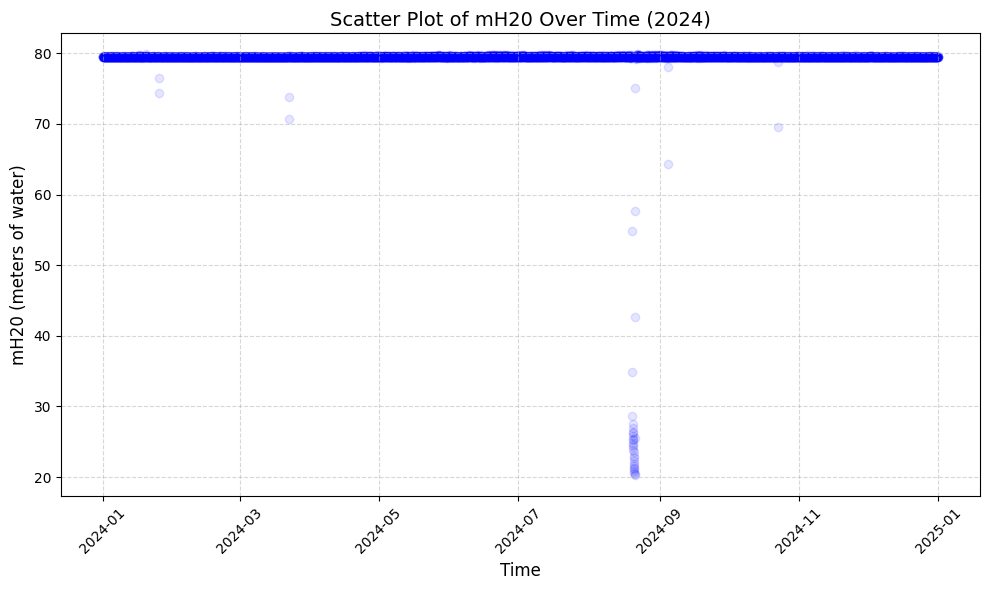

In [6]:
import matplotlib.pyplot as plt

Rjupnasalir_pressure_filtered = Rjupnasalir_pressure_2024.loc[start_date:end_date]
# Rjupnasalir_pressure_filtered = Rjupnasalir_pressure_2024


# Scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(Rjupnasalir_pressure_filtered.index, Rjupnasalir_pressure_filtered["mH20"], alpha=0.1, color='blue')
plt.title("Scatter Plot of mH20 Over Time (2024)", fontsize=14)
plt.xlabel("Time", fontsize=12)
plt.ylabel("mH20 (meters of water)", fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Input pressure

In [7]:
Rjupnasalir_input_pressure = pd.read_excel('Vatnsendi-Rjupnasalir-PrePumpPressure.xlsx')
Rjupnasalir_input_pressure.drop(columns=["mpoint_id","aggregate_name","aggregate_id","flag","quality_description","event_time"],inplace=True)

Rjupnasalir_input_pressure = Rjupnasalir_input_pressure[Rjupnasalir_input_pressure['mpoint_name'] == 'Rjúpnasalir - Stöðvarþrýstingur']



# Convert the remaining valid 'start_time' to datetime
Rjupnasalir_input_pressure['start_time'] = pd.to_datetime(Rjupnasalir_input_pressure['start_time'], errors='coerce')

# Set 'start_time' as index and sort
Rjupnasalir_input_pressure.set_index('start_time', inplace=True)
Rjupnasalir_input_pressure = Rjupnasalir_input_pressure.sort_index(ascending=True)

# Clean up the DataFrame
Rjupnasalir_input_pressure.drop(columns=["mpoint_name"], inplace=True)
Rjupnasalir_input_pressure.rename(columns={"value":"Input mH20"}, inplace=True)
Rjupnasalir_input_pressure['Input mH20'] = Rjupnasalir_input_pressure['Input mH20'] * 10.197

# Display the DataFrame
Rjupnasalir_input_pressure_2024 = Rjupnasalir_input_pressure.loc['2024']
Rjupnasalir_input_pressure_2024 = Rjupnasalir_input_pressure_2024.copy()
Rjupnasalir_input_pressure_2024.head()


,Input mH20
start_time,
2024-01-01 01:00:00,24.4728
2024-01-01 02:00:00,24.4728
2024-01-01 03:00:00,24.4728
2024-01-01 04:00:00,24.4728
2024-01-01 05:00:00,24.4728


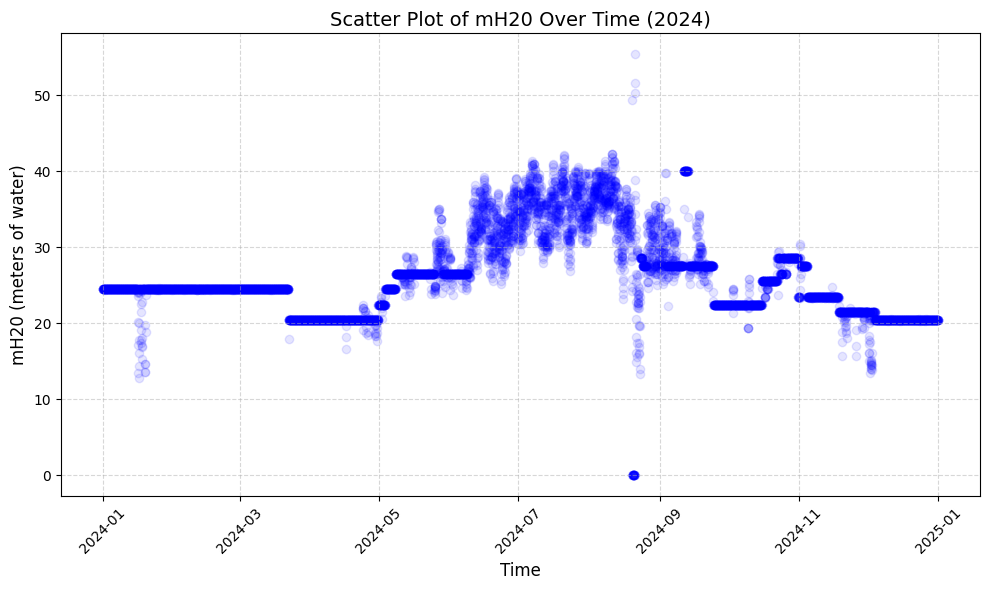

In [8]:
import matplotlib.pyplot as plt

Rjupnasalir_input_pressure_filtered = Rjupnasalir_input_pressure_2024.loc[start_date:end_date]
# Rjupnasalir_input_pressure_filtered = Rjupnasalir_input_pressure_2024



# Scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(Rjupnasalir_input_pressure_filtered.index, Rjupnasalir_input_pressure_filtered["Input mH20"], alpha=0.1, color='blue')
plt.title("Scatter Plot of mH20 Over Time (2024)", fontsize=14)
plt.xlabel("Time", fontsize=12)
plt.ylabel("mH20 (meters of water)", fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [9]:
Rjupnasalir_pressure_difference = pd.DataFrame()
Rjupnasalir_pressure_difference['difference in mH20'] = Rjupnasalir_pressure_filtered['mH20'] - Rjupnasalir_input_pressure_filtered['Input mH20']
# Rjupnasalir_pressure_difference.head()
Rjupnasalir_pressure_difference_filtered = Rjupnasalir_pressure_difference.loc[start_date:end_date]
Rjupnasalir_pressure_difference_filtered.head()

,difference in mH20
start_time,
2024-01-01 01:00:00,55.06380
2024-01-01 02:00:00,55.06380
2024-01-01 03:00:00,55.06380
2024-01-01 04:00:00,55.06380
2024-01-01 05:00:00,55.16577


## Flow in lps

In [10]:
Rjupnasalir_flow = pd.read_excel('H-KOP-RS-RS212.xlsx')
Rjupnasalir_flow.drop(columns=["mpoint_id","mpoint_name","aggregate_name","aggregate_id","flag","quality_description","event_time"],inplace=True)
Rjupnasalir_flow['start_time'] = pd.to_datetime(Rjupnasalir_flow['start_time'], errors='coerce')
Rjupnasalir_flow.set_index('start_time',inplace=True)
Rjupnasalir_flow = Rjupnasalir_flow.sort_index(ascending=True)
Rjupnasalir_flow_2024 = Rjupnasalir_flow.loc['2024']
Rjupnasalir_flow_2024 = Rjupnasalir_flow_2024.copy()    
Rjupnasalir_flow_2024.rename(columns={'value': 'Flæði [l/s]'}, inplace=True)
Rjupnasalir_flow_2024['Flæði [l/s]'] = Rjupnasalir_flow_2024['Flæði [l/s]']
# Rjupnasalir_flow_2024.head()
Rjupnasalir_flow_filtered = Rjupnasalir_flow_2024.loc[start_date:end_date]  
Rjupnasalir_flow_filtered.head()

,Flæði [l/s]
start_time,
2024-01-01 01:00:00,71.63
2024-01-01 02:00:00,72.20
2024-01-01 03:00:00,70.94
2024-01-01 04:00:00,69.50
2024-01-01 05:00:00,67.71


## Energy consumption in pump

In [11]:
df_pumps = pd.read_csv('Vatnsendi_rjupnasalir_pumppower_modfied.csv')

df_pumps = df_pumps[['mpoint_id','start_time','value']]
df_pumps['start_time'] = pd.to_datetime(df_pumps['start_time'], errors='coerce')
df_pumps.set_index('start_time', inplace=True)
df_pumps = df_pumps.sort_index(ascending=True)
df_pumps.head()

,mpoint_id,value
start_time,,
2022-01-01,H-KOP-VE-DÆ222-PS,0.000000
2022-01-01,H-KOP-RS-DÆ212-PS,28.914787
2022-01-01,H-KOP-VE-DÆ212-PS,17.676978
2022-01-01,H-KOP-VE-DÆ213-PS,5.088386
2022-01-01,H-KOP-RS-DÆ211-PS,11.380736


In [12]:
Rjupnasalir_dæla = df_pumps[df_pumps['mpoint_id'] == 'H-KOP-RS-DÆ222-PS']
Rjupnasalir_dæla_2024 = Rjupnasalir_dæla.loc['2024']
Rjupnasalir_dæla_2024 = Rjupnasalir_dæla_2024.copy()
Rjupnasalir_dæla_2024.drop(columns=['mpoint_id'],inplace=True)
Rjupnasalir_dæla_2024.rename(columns={'value': 'kW'}, inplace=True)
# erum með tvær eins dælur 
Rjupnasalir_dæla_2024['kW'] = Rjupnasalir_dæla_2024['kW'] * 2
# Rjupnasalir_dæla_2024.head()
Rjupnasalir_dæla_filtered = Rjupnasalir_dæla_2024.loc[start_date:end_date]
Rjupnasalir_dæla_filtered.head()



,kW
start_time,
2024-01-01 00:00:00,58.098275
2024-01-01 01:00:00,57.458256
2024-01-01 02:00:00,57.680747
2024-01-01 03:00:00,57.015135
2024-01-01 04:00:00,56.171442


## Theoretical power

In [13]:
df_calc_eff = pd.concat([Rjupnasalir_pressure_filtered,Rjupnasalir_input_pressure_filtered,Rjupnasalir_pressure_difference,Rjupnasalir_flow_filtered,Rjupnasalir_dæla_filtered],axis=1,join='outer')
df_calc_eff['Theoretical power'] = df_calc_eff['Flæði [l/s]']*(df_calc_eff['difference in mH20'])*9.81/1000
df_calc_eff.head()

,mH20,Input mH20,difference in mH20,Flæði [l/s],kW,Theoretical power
start_time,,,,,,
2024-01-01 00:00:00,NaN,NaN,NaN,NaN,58.098275,NaN
2024-01-01 01:00:00,79.5366,24.4728,55.0638,71.63,57.458256,38.692798
2024-01-01 02:00:00,79.5366,24.4728,55.0638,72.20,57.680747,39.000698
2024-01-01 03:00:00,79.5366,24.4728,55.0638,70.94,57.015135,38.320077
2024-01-01 04:00:00,79.5366,24.4728,55.0638,69.50,56.171442,37.542224


## Pump Efficiency

In [14]:
df_calc_eff['Efficiency'] = df_calc_eff['Theoretical power']/df_calc_eff['kW']
df_calc_eff.head()

,mH20,Input mH20,difference in mH20,Flæði [l/s],kW,Theoretical power,Efficiency
start_time,,,,,,,
2024-01-01 00:00:00,NaN,NaN,NaN,NaN,58.098275,NaN,NaN
2024-01-01 01:00:00,79.5366,24.4728,55.0638,71.63,57.458256,38.692798,0.673407
2024-01-01 02:00:00,79.5366,24.4728,55.0638,72.20,57.680747,39.000698,0.676148
2024-01-01 03:00:00,79.5366,24.4728,55.0638,70.94,57.015135,38.320077,0.672104
2024-01-01 04:00:00,79.5366,24.4728,55.0638,69.50,56.171442,37.542224,0.668351


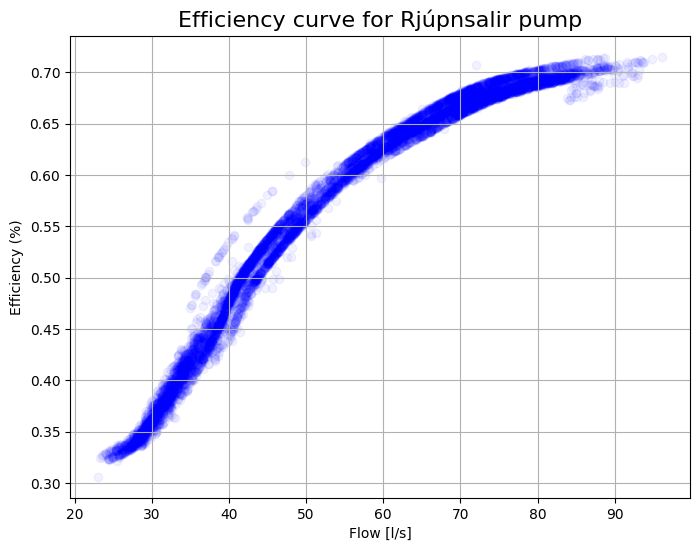

In [15]:


# Drop rows where 'Efficiency' or 'Flæði(l/s)' is NaN or zero
df_clean = df_calc_eff.dropna(subset=['Flæði [l/s]', 'Efficiency'])
df_clean = df_clean[df_clean['Efficiency'] > 0]  # Remove rows where Efficiency is 0
df_clean = df_clean[df_clean['Flæði [l/s]'] >= 20]  # Keep only flow rates 20 l/s or higher
# df_clean = df_clean[df_clean['Efficiency'] < 0.6]  # Remove rows where Efficiency is 0
df_clean = df_clean[df_clean['Efficiency'] < 1.2]  # Remove rows where Efficiency is 0


# Plot Efficiency vs Flow
plt.figure(figsize=(8, 6))
plt.scatter(df_clean['Flæði [l/s]'], df_clean['Efficiency'], marker='o', color='b',alpha = 0.05)

# Adding titles and labels
plt.title('Efficiency curve for Rjúpnsalir pump', fontsize=16)
plt.xlabel('Flow [l/s]')
plt.ylabel('Efficiency (%)')
plt.grid(True)

# Display the plot
plt.show()

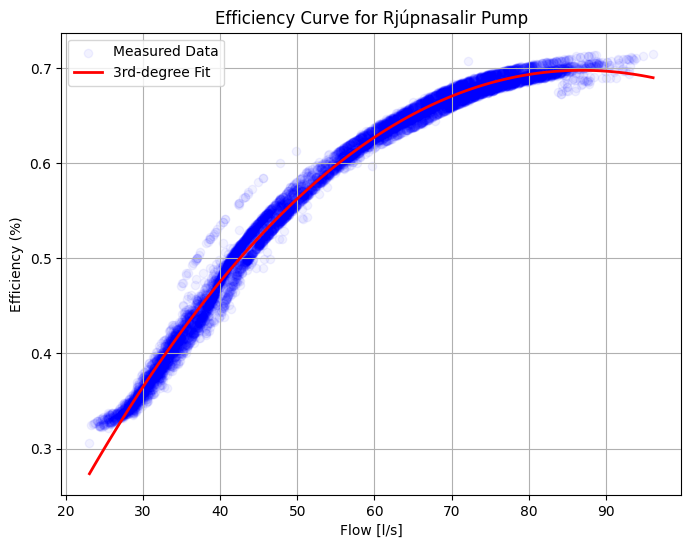

R² = 0.992
RMSE = 0.010
Fitted Polynomial:          3             2
1.8e-07 x - 0.0001395 x + 0.02017 x - 0.1193


In [16]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score, mean_squared_error

# Extract X (flow rate) and Y (efficiency)
X = df_clean['Flæði [l/s]'].values
Y = df_clean['Efficiency'].values

# Fit a 3rd-degree polynomial
coeffs = np.polyfit(X, Y, 3)
poly_func = np.poly1d(coeffs)

# Generate fitted values
X_fit = np.linspace(min(X), max(X), 100)
Y_fit = poly_func(X_fit)

# Calculate R² and RMSE
Y_pred = poly_func(X)
r2 = r2_score(Y, Y_pred)
rmse = np.sqrt(mean_squared_error(Y, Y_pred))

# Plot data and fitted curve
plt.figure(figsize=(8, 6))
plt.scatter(X, Y, marker='o', color='b', alpha=0.05, label='Measured Data')
plt.plot(X_fit, Y_fit, color='r', linewidth=2, label='3rd-degree Fit')

# Adding titles and labels
plt.title('Efficiency Curve for Rjúpnasalir Pump')
plt.xlabel('Flow [l/s]')
plt.ylabel('Efficiency (%)')
plt.legend()
plt.grid(True)

# Display the plot
plt.show()

# Print performance metrics and polynomial
print(f'R² = {r2:.3f}')
print(f'RMSE = {rmse:.3f}')
print(f'Fitted Polynomial: {poly_func}')


In [17]:
# df_clean.to_excel("filename.xlsx", index=False)

